# Quantum Machine Learning Guide

> 양자 컴퓨팅 프레임워크에 대한 개략적인 소개와 QML의 구현 방법을 제공합니다.

일반적으로 2개의 주요 양자 컴퓨팅 프레임워크가 있습니다:
1. **Pennylane**: 양자 머신러닝에 중점을 둔 프레임워크로, 다양한 양자 하드웨어 백엔드를 지원합니다.
2. **Qiskit**: IBM에서 개발한 프레임워크로, 좀 더 물리적인 실험과 대규모 HPC(High Performance Computing) 연산을 포함하는 통합적인 프레임워크를 제공합니다.

여기에서는 QML 구현을 위해 Pennylane을 사용합니다.

In [ ]:
# 사용할 라이브러리 설치
#!pip install pennylane torch torchvision

## 양자 회로 설계하기

In [1]:
import pennylane as qml
import numpy as np

dev = qml.device("default.qubit", wires=3) # device 정의

@qml.qnode(dev) # QNode 데코레이터로 양자 회로 정의
def circuit():
    qml.H(0)
    qml.S(0)
    qml.RX(0.32, wires=0)
    qml.H(2)
    return qml.probs()

## 양자 회로 그리기

In [2]:
print(qml.draw(circuit)()) # 양자 회로 그리기

0: ──H──S──RX(0.32)─┤  Probs
2: ──H──────────────┤  Probs


(<Figure size 600x300 with 1 Axes>, <Axes: >)

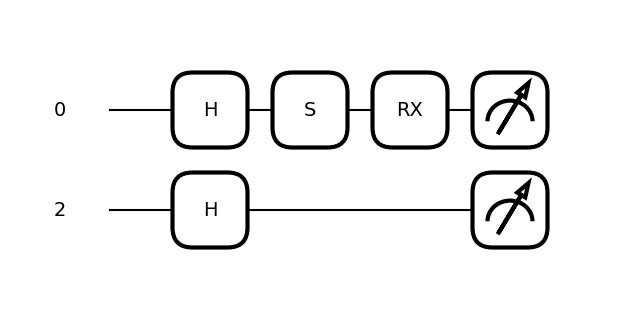

In [3]:
qml.draw_mpl(circuit)()

|양자 회로|ML|
|:---:|:---:|
|Quantum Circuit|Layer, ML Module|
|Backend|device(CPU, CUDA, ...)|

## Backend

Backend는 실제 양자 회로를 구동하는 시뮬레이터, 혹은 양자 컴퓨터입니다.
한 개의 회로를 어느 기기에서 구동할 지 미리 선언을 해주어야 합니다.

**Backend 선택**
다양한 Backend를 양자 회로를 구동하는데 사용할 수 있습니다. Pennylane의 `default.qubit`, `lighting.qubit` 등 뿐만 아니라, Qiskit, IQM 등 실제 양자 컴퓨터의 Backend interface를 가져와 사용할 수도 있습니다.

그러나, QML을 구현하고 시험해 볼 때는 `default.qubit`이 권장됩니다. 다른 ML 프레임워크와의 결합도 간편할 뿐더러 가장 빠른 differentiation 방법을 제공합니다.

In [4]:
NUMBER_OF_WIRES = 20
dev = qml.device("default.qubit", wires=NUMBER_OF_WIRES, shots=3000) # device 정의

## 측정
- `qml.probs` : 개별 state들의 측정 확률 벡터입니다. $N$ qubit에 대해 $2^N$개의 확률을 반환합니다.
- `qml.expval` : Pennylane의 Observable들을 측정합니다. 기초적으로 `qml.PauliZ(i)`, `qml.PauliX(i)`, `qml.PauliY(i)` 등의 Pauli 연산자를 사용합니다. 이 외에도 다양한 Observable를 지원합니다.

In [5]:
dev_3 = qml.device("default.qubit", wires=3) # device 정의

@qml.qnode(dev_3) # QNode 데코레이터로 양자 회로 정의
def circuit1():
    qml.H(0)
    qml.H(1)
    return qml.expval(qml.PauliX(0))

@qml.qnode(dev_3)
def circuit2():
    qml.H(0)
    qml.H(1)
    return qml.probs()

@qml.qnode(dev_3)
def circuit3():
    qml.H(0)
    qml.H(1)
    return [qml.expval(qml.PauliZ(i)) for i in range(3)]


$$<\psi|H|\psi>$$

In [7]:
circuit1()

np.float64(0.9999999999999996)

In [8]:
circuit2()

array([0.25, 0.  , 0.25, 0.  , 0.25, 0.  , 0.25, 0.  ])

In [9]:
circuit3()

[np.float64(0.0), np.float64(0.0), np.float64(0.9999999999999996)]

In [10]:
obs =qml.PauliZ(0) @ qml.PauliX(1)
obs

Z(0) @ X(1)

In [11]:
@qml.qnode(dev_3)
def circuit4():
    qml.H(0)
    qml.H(1)
    qml.H(2)
    return qml.expval(obs)

In [12]:
circuit4()

np.float64(0.0)

## 양자 회로의 설계

In [14]:
from pennylane import numpy as np_p

In [15]:
dev = qml.device("default.qubit", wires=1) # device 정의

@qml.qnode(dev) # QNode 데코레이터로 양자 회로 정의
def single_qubit_circuit(theta, input_value):
    qml.RX(theta, wires=0)
    qml.RY(input_value, wires=0)
    return qml.expval(qml.PauliZ(0))

In [16]:
single_qubit_circuit(0.1, 0.2)

np.float64(0.9751703272018161)